## MobileDeviceProcurement - Importing Data

In [50]:
import pandas as pd
xl = pd.ExcelFile("./data/TrainData.xlsx")
xl.sheet_names
df = xl.parse("Sheet1")

## MobileDeviceProcurement - Viewing the Data

In [51]:
df.columns = ['ID', 'LatestDevPurchased', 'FirstDevPurchased', 'TotDaysActive', 'LatestDeviceActive', 'IsApple', 'SwitchedAppleToNon', 'SwitchedBetweenApple', 'Enrolled']
#df.tail()
#df.describe()
#df.info()
#df.shape
#df.IsApple.value_counts()
#df.isnull().values.any()

## MobileDeviceProcurement - Molding the Column values

In [52]:
Enrolled_Map = {'N': 0, 'Y': 1}
IsApple_Map = {'NON-APPLE': 0, 'APPLE': 1}

df['Enrolled'] = df['Enrolled'].map(Enrolled_Map)
df['IsApple'] = df['IsApple'].map(IsApple_Map)

In [53]:
[df['Enrolled'][160:165], df['IsApple'][5:10]]

[160    0
 161    1
 162    0
 163    0
 164    0
 Name: Enrolled, dtype: int64, 5    0
 6    1
 7    0
 8    0
 9    1
 Name: IsApple, dtype: int64]

## MobileDeviceProcurement - Removing 'Days' from columns


In [54]:
df['TotDaysActive'] = pd.to_numeric(df['TotDaysActive'].str.replace('Days', ''))
df['LatestDeviceActive'] = pd.to_numeric(df['LatestDeviceActive'].str.replace('Days', ''))

df.head()

,ID,LatestDevPurchased,FirstDevPurchased,TotDaysActive,LatestDeviceActive,IsApple,SwitchedAppleToNon,SwitchedBetweenApple,Enrolled
0,10001,2017-07-18,2014-05-07,1168,0,0,1,0,0
1,10002,2017-05-09,2014-07-03,1111,70,0,1,0,0
2,10003,2017-07-18,2014-08-15,1068,0,0,1,0,0
3,10007,2016-07-07,2013-06-29,1480,376,0,1,0,0
4,10008,2016-07-07,2013-05-20,1520,376,0,1,0,0


## MobileDeviceProcurement - Viewing the Correlation

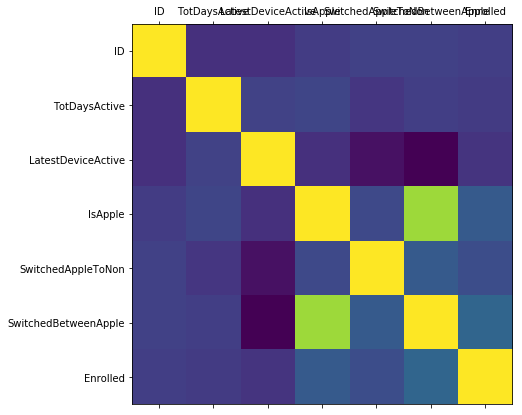

In [55]:
import matplotlib.pyplot as plt

%matplotlib inline

def plot_corr(df, size=7):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(df, 7)

## MobileDeviceProcurement - Checking Enrolled Column - True/False ratio

In [56]:
total_values = len(df)
total_true = len(df.loc[df.Enrolled == 1])
total_false = len(df.loc[df.Enrolled == 0])

print('Number of True cases: {0} ({1:2.2f}%)'.format(total_true, (total_true/total_values)*100))
print('Number of False cases: {0} ({1:2.2f}%)'.format(total_false, (total_false/total_values)*100))


Number of True cases: 372 (1.86%)
Number of False cases: 19630 (98.14%)


## MobileDeviceProcurement - Splitting the Data - 70% - 30%

In [57]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['ID', 'TotDaysActive', 'LatestDeviceActive', 'IsApple', 'SwitchedAppleToNon', 'SwitchedBetweenApple']
predictied_col_names = ['Enrolled']

x = df[feature_col_names].values
y = df[predictied_col_names].values

split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42)

print("{0:0.2f}% in training set".format((len(x_train)/len(df.ID))*100))
print("{0:0.2f}% in test set".format((len(x_test)/len(df.ID))*100))

70.00% in training set
30.00% in test set


## MobileDeviceProcurement - Training with Algorithm - Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

nb_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None)

## MobileDeviceProcurement - Checking performance on Training Data

In [59]:
nb_predict_train = nb_model.predict(x_train)

from sklearn import metrics

print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train, nb_predict_train)))

Accuracy: 0.9768


## MobileDeviceProcurement - Checking performance on Test Data

In [60]:
nb_predict_test = nb_model.predict(x_test)

from sklearn import metrics

print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.9748


## MobileDeviceProcurement - Viewing Consusion and Classification Matrix

In [61]:
print('Consusion Matrix') #clockwise values - TP, FP, TN, FN
print('{0}'.format(metrics.confusion_matrix(y_test, nb_predict_test, labels=[1,0])))
print('')

print('Classification Report')
print('{0}'.format(metrics.classification_report(y_test, nb_predict_test, labels=[1,0])))



Consusion Matrix
[[   3  106]
 [  45 5847]]

Classification Report
             precision    recall  f1-score   support

          1       0.06      0.03      0.04       109
          0       0.98      0.99      0.99      5892

avg / total       0.97      0.97      0.97      6001



In [62]:
#len(y_test)
#print(len(nb_predict_test))
print(nb_predict_test)

[0 0 0 ..., 0 0 0]


## MobileDeviceProcurement - Training with Algorithm - Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

## MobileDeviceProcurement - Checking performance on Train and Test Data

In [64]:
rf_predict_train = rf_model.predict(x_train)

print('Train Data Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train, rf_predict_train)))

rf_predict_test = rf_model.predict(x_test)

print('Test Data Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test, rf_predict_test)))

Train Data Accuracy: 0.9961
Test Data Accuracy: 0.9797


## MobileDeviceProcurement - Viewing Consusion and Classification Matrix

In [65]:
print('Consusion Matrix') #clockwise values - TP, FP, TN, FN
print('{0}'.format(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1,0])))
print('')

print('Classification Report')
print('{0}'.format(metrics.classification_report(y_test, rf_predict_test, labels=[1,0])))

Consusion Matrix
[[   2  107]
 [  15 5877]]

Classification Report
             precision    recall  f1-score   support

          1       0.12      0.02      0.03       109
          0       0.98      1.00      0.99      5892

avg / total       0.97      0.98      0.97      6001



## MobileDeviceProcurement - Training with Algorithm - Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=0.1, class_weight="balanced", random_state=42) #C - Regularization Parameter, class_weight - hyperpameter
lr_model.fit(x_train, y_train.ravel())

lr_predict_train = lr_model.predict(x_train)
lr_predict_test = lr_model.predict(x_test)

print('Train Data Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train, lr_predict_train)))
print('Test Data Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test, lr_predict_test)))

print('Consusion Matrix') #clockwise values - TP, FP, TN, FN
print('{0}'.format(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1,0])))
print('')

print('Classification Report')
print('{0}'.format(metrics.classification_report(y_test, lr_predict_test, labels=[1,0])))

Train Data Accuracy: 0.7739
Test Data Accuracy: 0.7734
Consusion Matrix
[[ 104    5]
 [1355 4537]]

Classification Report
             precision    recall  f1-score   support

          1       0.07      0.95      0.13       109
          0       1.00      0.77      0.87      5892

avg / total       0.98      0.77      0.86      6001



## MobileDeviceProcurement - Finding out best Regularization Parameter for maximum Recall value

1st max value of 0.954 occured at C=0.100000


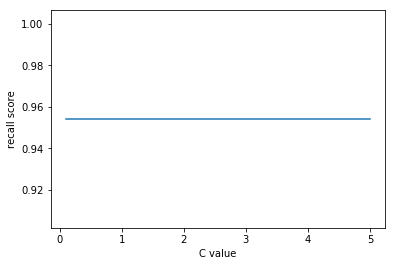

In [67]:
C_start = 0.1
C_end = 5.0
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while(C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42)
    lr_model_loop.fit(x_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(x_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if(recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:3f}".format(best_recall_score, best_score_C_val))

plt.plot(C_values, recall_scores, "-")
plt.xlabel('C value')
plt.ylabel('recall score')


## MobileDeviceProcurement - Training with Algorithm - Logistic Regression CV

In [68]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, Cs = 3, cv=10, refit=True, class_weight="balanced", random_state=42) #C - Regularization Parameter, class_weight - hyperpameter
lr_cv_model.fit(x_train, y_train.ravel())

lr_cv_predict_train = lr_cv_model.predict(x_train)
lr_cv_predict_test = lr_cv_model.predict(x_test)

print('Train Data Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train, lr_cv_predict_train)))
print('Test Data Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test, lr_cv_predict_test)))

print('Consusion Matrix') #clockwise values - TP, FP, TN, FN
print('{0}'.format(metrics.confusion_matrix(y_test, lr_cv_predict_test, labels=[1,0])))
print('')

print('Classification Report')
print('{0}'.format(metrics.classification_report(y_test, lr_cv_predict_test, labels=[1,0])))

Train Data Accuracy: 0.7741
Test Data Accuracy: 0.7734
Consusion Matrix
[[ 103    6]
 [1354 4538]]

Classification Report
             precision    recall  f1-score   support

          1       0.07      0.94      0.13       109
          0       1.00      0.77      0.87      5892

avg / total       0.98      0.77      0.86      6001



## MobileDeviceProcurement - Predicting Test Data with Logistic Regression

In [69]:
#importing TestData.xlsx
xl_test = pd.ExcelFile("./data/TestData.xlsx")
xl_test.sheet_names
df_test = xl_test.parse("Sheet1")

#molding columns value
df_test.columns = ['ID', 'LatestDevPurchased', 'FirstDevPurchased', 'TotDaysActive', 'LatestDeviceActive', 'IsApple', 'SwitchedAppleToNon', 'SwitchedBetweenApple', 'Enrolled']
IsApple_Map = {'NON-APPLE': 0, 'APPLE': 1}

df_test['IsApple'] = df_test['IsApple'].map(IsApple_Map)
df_test['TotDaysActive'] = pd.to_numeric(df_test['TotDaysActive'].str.replace('Days', ''))
df_test['LatestDeviceActive'] = pd.to_numeric(df_test['LatestDeviceActive'].str.replace('Days', ''))

#predicting output
x_test = df_test[feature_col_names].values
lr_predict_test = lr_model.predict(x_test)

print(lr_predict_test)

[0 0 1 ..., 0 0 0]
